In [21]:
from FirstModelOOP import FirstModel
from brian2 import*
import functions


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create, Run and Plot
Create the Model.
Run the model for 100 ms.
Plot the voltages of some cells.

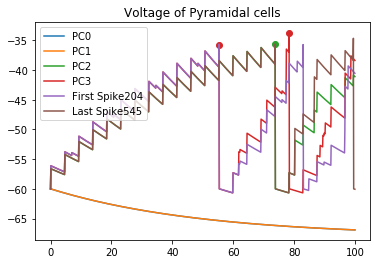

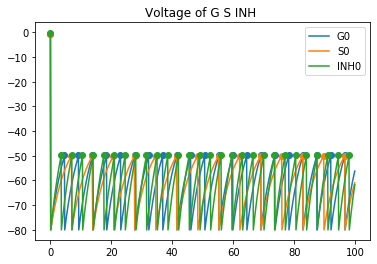

In [31]:
start_scope()

params = {}

fm1 = FirstModel(params)


fm1.run(duration= 100 * ms, show_PC=True, show_other=True)


## Spike time plots
Plot distribution of spiking times.
And visualise spiking times of the place cells.

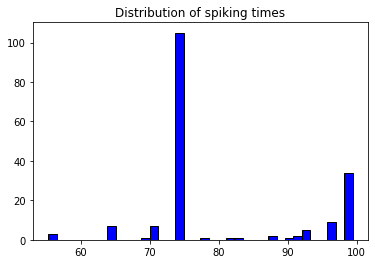

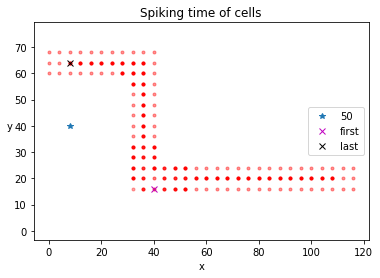

In [33]:
functions.plot_spike_times(fm1)

## Structure of the network
Plot the connectivity of the cells:
- Reccurrent connectivity
- G inputs, tonic input along the trajectory
- S inputs, external triggering

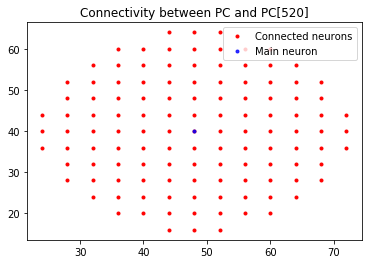

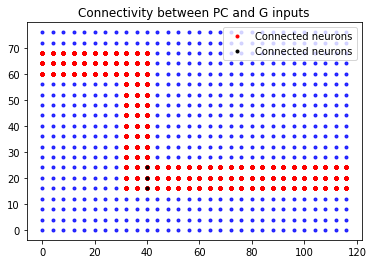

In [34]:
functions.plot_connectivity(fm1, [fm1.SPC], "PC[" +str(520)+ "]" , 250)
show()

functions.plot_connectivity(fm1, [fm1.SPCG, fm1.SS], "G inputs")
show()

## Distribution of parameters
Plot distribtution of certain parameters:
- Weight parameters
- Delay parameters

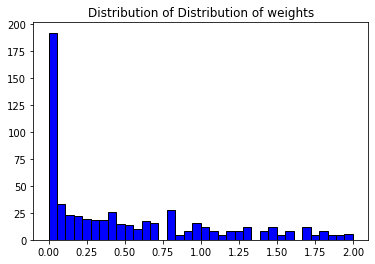

In [17]:
n = fm1.p['rows'] * fm1.p['cols']
list_ = []
for i in range(n):
    list_.append(2*exp(-((fm1.PC.x[150]-fm1.PC.x[i])**2+(fm1.PC.y[150] - fm1.PC.y[i])**2)/(30*metre)**2))

functions.plot_distrib(list_, "Distribution of weights")

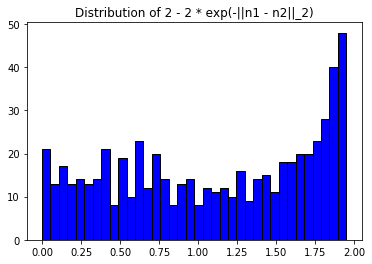

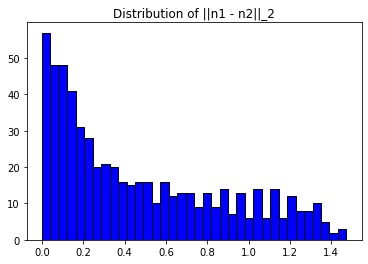

In [18]:
functions.plot_different_distances(fm1)

## Visualise distances
Norm l2 distance.

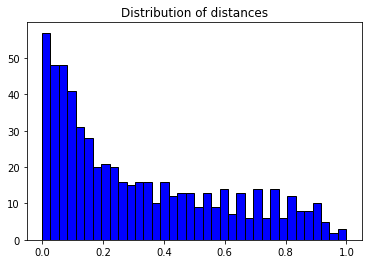

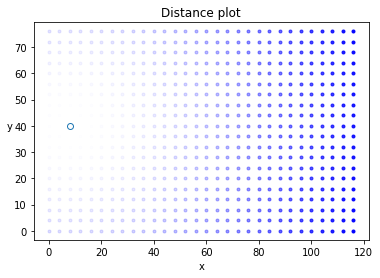

In [207]:
neuron_idx = 50
functions.plot_distance(fm1)

## Visualise connectivity between cells.
Disclaimer: takes a lot of time to run.

KeyboardInterrupt: 

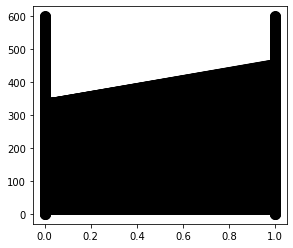

In [6]:
functions.visualise_connectivity(fm1.SPC, "Recurrent connectivity")
functions.visualise_connectivity(fm1.SPCINH, "Connectivity PC and Inhibitory")
functions.visualise_connectivity(fm1.SPCG, "Recurrent connectivity PC and G")


## Parameter exploration
Can explore the different parameters and their consequences.

In [ ]:
for i in range(3):
    print('For model ',i)
    start_scope()
    p = {
            # Tonic Neurons
            "v_reset_tonic" : -80 + i*30,        # Leak potential
            "v_leak_tonic" : -80,         # Reset potential
            "v_thr_tonic" : -50,          # Spiking threshold
            'tau_dyn_tonic': 5 * ms,      # Leak timescale
            "tau_refr_tonic" : 2 * ms,    # Refractory period
            "gi_tonic" : 1,               # ???

            # External Input Neurons
            "v_reset_ext": -80 + i*30,  # Leak potential
            "v_leak_ext": -80,  # Reset potential
            "v_thr_ext": -50,  # Spiking threshold
            'tau_dyn_ext': 5 * ms,  # Leak timescale
            "tau_refr_ext": 2 * ms,  # Refractory period
            "gi_ext": 1,  # ???
    }
    fm1 = FirstModel(p)
    fm1.run(show_other=True)